In [452]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [453]:
window = 243

# 持仓盈亏与盈亏占比

In [454]:
df = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/881001.WI.xlsx')

In [455]:
df.tail()

,turnover days,current return,profit percentage
2018-07-05,73.124165,-0.183235,0.090231
2018-07-06,73.157256,-0.176428,0.116709
2018-07-09,73.277171,-0.156836,0.198412
2018-07-10,73.318154,-0.148010,0.230798
2018-07-11,73.403764,-0.164910,0.152161


In [456]:
df = df[df.index >= '2013-01-01']

# 加权回购期限

In [457]:
repo = pd.read_excel('D:/Data/risk/weighted_repo.xlsx')

In [458]:
# repo.tail()

# 股票流动性风险

In [459]:
st_li = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/amihud_liquidity.xlsx')

In [460]:
# st_li.tail()

In [461]:
st_li['z'] = st_li['wdqa_corwin and schultz'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [462]:
st_li.loc[st_li['z'].abs() < 2, 'z'] = 0

In [463]:
st_li.tail()

,sz50_amihud,sz50_corwin and schultz,sz50_wu,sz_roll,wdqa_amihud,wdqa_wu,wdqa_corwin and schultz,wdqa_roll,hs300_amihud,hs300_wu,...,zz800_roll,zxb_amihud,zxb_wu,zxb_corwin and schultz,zxb_roll,cyb_amihud,cyb_wu,cyb_corwin and schultz,cyb_roll,z
2018-07-05,0.000730,0.005999,5.025869,0.008677,0.022788,5.473787,0.013527,0.018725,0.002303,3.065272,...,0.015586,0.022008,11.058279,0.007143,0.022649,0.003026,2.094256,0.002679,0.016316,0.00000
2018-07-06,0.000315,0.006657,1.794478,0.009274,0.011995,2.922703,0.001123,0.018869,0.000958,1.359434,...,0.015807,0.010770,5.247685,0.004710,0.023078,0.001410,1.214556,0.014288,0.016828,0.00000
2018-07-09,0.000941,0.012134,5.110159,0.009485,0.014815,3.553693,0.005527,0.018802,0.001901,3.067629,...,0.015707,0.006066,3.147633,0.005960,0.022858,0.002287,2.000688,0.002198,0.016580,0.00000
2018-07-10,0.000366,0.001827,1.831108,0.009414,0.007887,1.770193,0.008566,0.018668,0.000847,1.308655,...,0.015550,0.004447,2.086846,0.018824,0.022620,0.001051,0.862251,0.003334,0.016522,0.00000
2018-07-11,0.001216,0.024462,5.152793,0.009493,0.018249,4.181354,0.020730,0.018803,0.002539,3.499941,...,0.015615,0.003592,1.664045,0.029990,0.022738,0.002440,1.719825,0.017076,0.016524,2.09726


# 人民币资产和全球资产系统性风险

In [464]:
risk = pd.read_excel('D:/Data/risk/systematic.xlsx')

In [465]:
risk.tail()

,China,Global
2018-07-05,0.709801,0.905121
2018-07-06,0.708139,0.904222
2018-07-09,0.707137,0.903319
2018-07-10,0.706194,0.902339
2018-07-11,0.705842,0.901796


In [466]:
risk['China z'] = risk['China'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())
risk['Global z'] = risk['Global'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 股债相对收益率

In [467]:
eyby = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/EYBY.xlsx')

In [468]:
eyby.tail()

,pe_ttm,ytm_b,close
2018-07-04,15.5353,4.2803,3744.8972
2018-07-05,15.3413,4.2580,3685.2029
2018-07-06,15.4147,4.2573,3706.1205
2018-07-09,15.8165,4.2628,3798.1284
2018-07-10,15.8959,4.2670,3817.6416


In [469]:
eyby = eyby.dropna()

In [470]:
eyby['spread'] = ((100. / eyby['pe_ttm']) - eyby['ytm_b']).rolling(window=5).mean()
eyby['spread'] = eyby['spread'] / 100

In [471]:
eyby['z'] = eyby['spread'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 市场一致度

In [472]:
cons = pd.read_excel('D:/workspace/zjsxzy_in_js/website/everyday-update/data/consistency.xlsx', index_col=0)

In [473]:
cons.tail()

,con60
date,
2018-07-05,0.857533
2018-07-06,0.856032
2018-07-09,0.861756
2018-07-10,0.860782
2018-07-11,0.863752


In [474]:
cons = cons[cons.index >= '2005-01-01']

In [475]:
cons['z'] = cons['con60'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 债券流动性

In [476]:
bo_li = pd.read_excel('D:/Data/risk/bond_liquidity.xlsx', index_col=0)

In [477]:
bo_li.tail()

,ILLIQUIDITY
TRADINGDAY,
2018-07-04,1.213571
2018-07-05,0.914189
2018-07-06,1.367551
2018-07-09,0.976435
2018-07-10,1.442613


In [478]:
bo_li['z'] = bo_li['ILLIQUIDITY'].rolling(window=window).apply(lambda x: (x[-1] - x.mean()) / x.std())

In [479]:
bo_li.loc[bo_li['z'].abs() < 2, 'z'] = 0

# 点击量数据

In [480]:
click = pd.read_excel(u'D:/Data/risk/点击量数据.xlsx')

In [481]:
click.tail()

,Date,Page Clicks,# of Users
1418,2018-07-05,3143334.0,888485.0
1419,2018-07-06,3355189.0,889575.0
1420,2018-07-09,3160802.0,928742.0
1421,2018-07-10,3058797.0,873145.0
1422,2018-07-11,3113398.0,883962.0


In [482]:
click = click.set_index('Date')

In [483]:
click['click'] = click['Page Clicks'].rolling(20).mean()

In [484]:
click['z'] = click['click'].rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

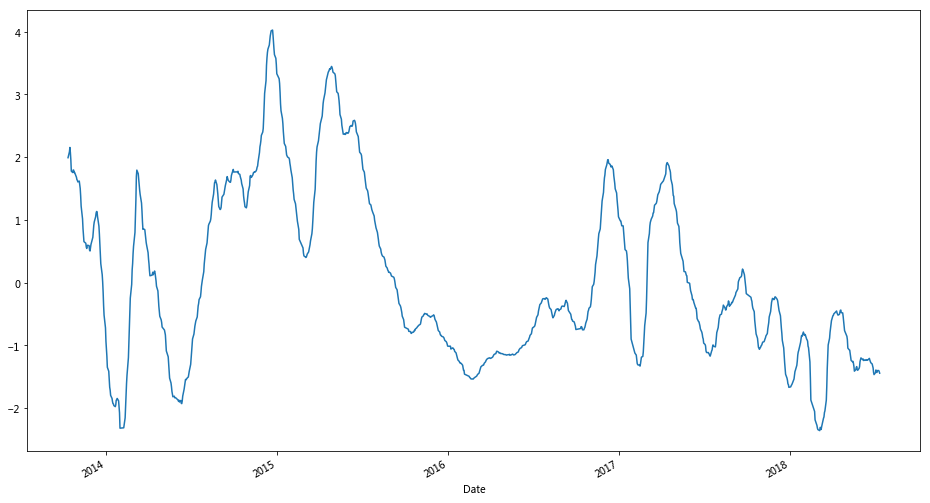

In [485]:
click['z'].plot(figsize=(16, 9))

# 美欧经济意外指数之差

In [486]:
us_eu = pd.read_excel('D:/Data/macro/us/econ_accident.xlsx')

In [487]:
us_eu['diff'] = us_eu['us econ ac'] - us_eu['eu econ ac']

# 铜油比

In [488]:
cop = pd.read_excel(u'D:/Data/industry/metal/LME铜三个月期货价格.xlsx')
oil = pd.read_excel(u'D:/Data/industry/metal/Brent油价.xlsx')

In [489]:
cop_oil_ratio = (cop[cop.columns[0]] / oil[oil.columns[0]]).dropna()

In [490]:
cop_oil_z = cop_oil_ratio.rolling(window).apply(lambda x: (x[-1] - x.mean()) / x.std())

# 画图

Text(0.5,1,u'\u94dc\u6cb9\u6bd4')

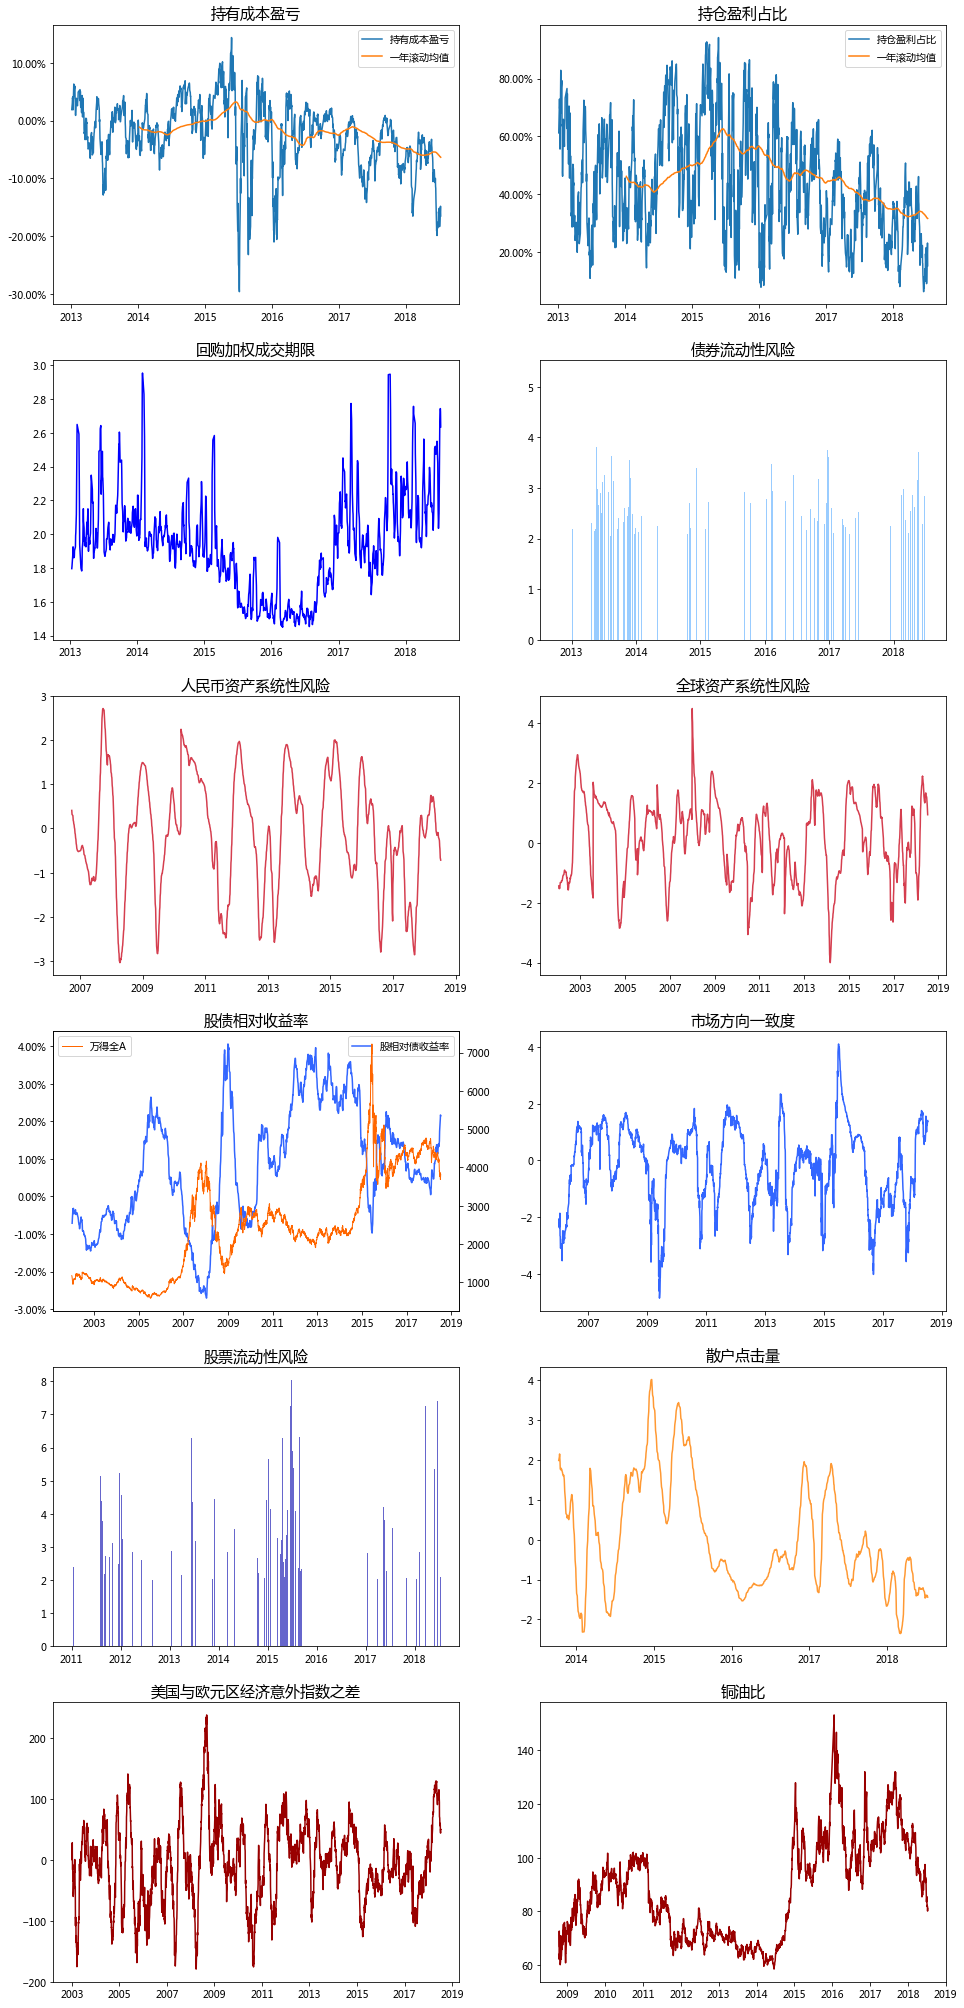

In [491]:
fig = plt.figure(figsize=(16, 36))
row = 6

ax1 = fig.add_subplot(row, 2, 1)
ax1.plot(df.index, df['current return'], label=u'持有成本盈亏')
ax1.plot(df.index, df['current return'].rolling(window=243).mean(), label=u'一年滚动均值')
ax1.legend()
ax1.set_title(u'持有成本盈亏', fontsize=15)
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax2 = fig.add_subplot(row, 2, 2)
ax2.plot(df.index, df['profit percentage'], label=u'持仓盈利占比')
ax2.plot(df.index, df['profit percentage'].rolling(window=243).mean(), label=u'一年滚动均值')
ax2.legend()
ax2.set_title(u'持仓盈利占比', fontsize=15)
vals = ax2.get_yticks()
ax2.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])

ax3 = fig.add_subplot(row, 2, 3)
ax3.plot(repo.index, repo['rolling mean'], c='blue')
ax3.set_title(u'回购加权成交期限', fontsize=15)

ax4 = fig.add_subplot(row, 2, 4)
ax4.bar(bo_li.index, bo_li['z'].abs(), color='#99CCFF', width=5)
ax4.set_title(u'债券流动性风险', fontsize=15)

ax5 = fig.add_subplot(row, 2, 5)
ax5.plot(risk.index, risk['China z'], c='#D53E4F')
ax5.set_title(u'人民币资产系统性风险', fontsize=15)

ax6 = fig.add_subplot(row, 2, 6)
ax6.plot(risk.index, risk['Global z'], c='#D53E4F')
ax6.set_title(u'全球资产系统性风险', fontsize=15)

ax7 = fig.add_subplot(row, 2, 7)
ax7.plot(eyby.index, eyby['spread'], label=u'股相对债收益率', c='#3366FF')
ax7.legend()
vals = ax7.get_yticks()
ax7.set_yticklabels(['{:3.2f}%'.format(x*100) for x in vals])
ax77 = ax7.twinx()
ax77.plot(eyby.index, eyby['close'], label=u'万得全A', color='#FF6600', linewidth=1)
ax77.legend(loc='upper left')
ax7.set_title(u'股债相对收益率', fontsize=15)

ax8 = fig.add_subplot(row, 2, 8)
ax8.plot(cons.index, cons['z'], c='#3366FF')
ax8.set_title(u'市场方向一致度', fontsize=15)

ax9 = fig.add_subplot(row, 2, 9)
ax9.bar(st_li.index, st_li['z'].abs(), color='#6666CC', width=5)
ax9.set_title(u'股票流动性风险', fontsize=15)

ax10 = fig.add_subplot(row, 2, 10)
ax10.plot(click.index, click['z'], c='#FF9933')
ax10.set_title(u'散户点击量', fontsize=15)

ax11 = fig.add_subplot(row, 2, 11)
ax11.plot(us_eu['diff'], color='#990000')
ax11.set_title(u'美国与欧元区经济意外指数之差', fontsize=15)

ax12 = fig.add_subplot(row, 2, 12)
ax12.plot(cop_oil_ratio, color='#990000')
ax12.set_title(u'铜油比', fontsize=15)

In [492]:
fig.savefig('plot.png', dpi=200, bbox_inches='tight')